In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wd = "."
input_id = "faba_pandda_hits"
in_dir = os.path.join(wd, "input", input_id)
out_dir = os.path.join(wd, "output", input_id)
results_dir = os.path.join(out_dir, "results")

final_df = pd.read_pickle(os.path.join(results_dir, "{}_results_table.pkl".format(input_id)))

In [3]:
final_df.columns.tolist()

['UniProt_ResNum',
 'alignment_column',
 'shenkin',
 'occ',
 'gaps',
 'occ_pct',
 'gaps_pct',
 'rel_norm_shenkin',
 'abs_norm_shenkin',
 'human_shenkin',
 'human_occ',
 'human_gaps',
 'human_occ_pct',
 'human_gaps_pct',
 'variants',
 'oddsratio',
 'pvalue',
 'se_OR',
 'AA',
 'RSA',
 'SS',
 'binding_sites']

In [4]:
final_df

,UniProt_ResNum,alignment_column,shenkin,occ,gaps,occ_pct,gaps_pct,rel_norm_shenkin,abs_norm_shenkin,AA,RSA,SS,binding_sites
0,3,2,12.00,164,602,21.41,78.59,8.67,5.26,K,90.92,C,[4]
1,4,3,14.75,187,579,24.41,75.59,12.64,7.68,Q,47.32,C,[4]
2,5,4,15.67,190,576,24.80,75.20,13.97,8.48,H,45.52,C,[8]
3,6,5,12.49,191,575,24.93,75.07,9.37,5.69,A,44.84,C,[8]
4,7,6,12.11,191,575,24.93,75.07,8.82,5.36,F,5.34,B,[4]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,165,201,13.82,219,547,28.59,71.41,11.29,6.86,F,17.64,E,"[0, 3, 5, 6]"
161,166,202,15.92,207,559,27.02,72.98,14.33,8.70,T,76.06,S,"[0, 5]"
162,167,203,14.55,191,575,24.93,75.07,12.35,7.50,S,63.45,C,"[0, 5]"
163,168,204,11.93,177,589,23.11,76.89,8.56,5.20,T,26.05,C,"[0, 6]"


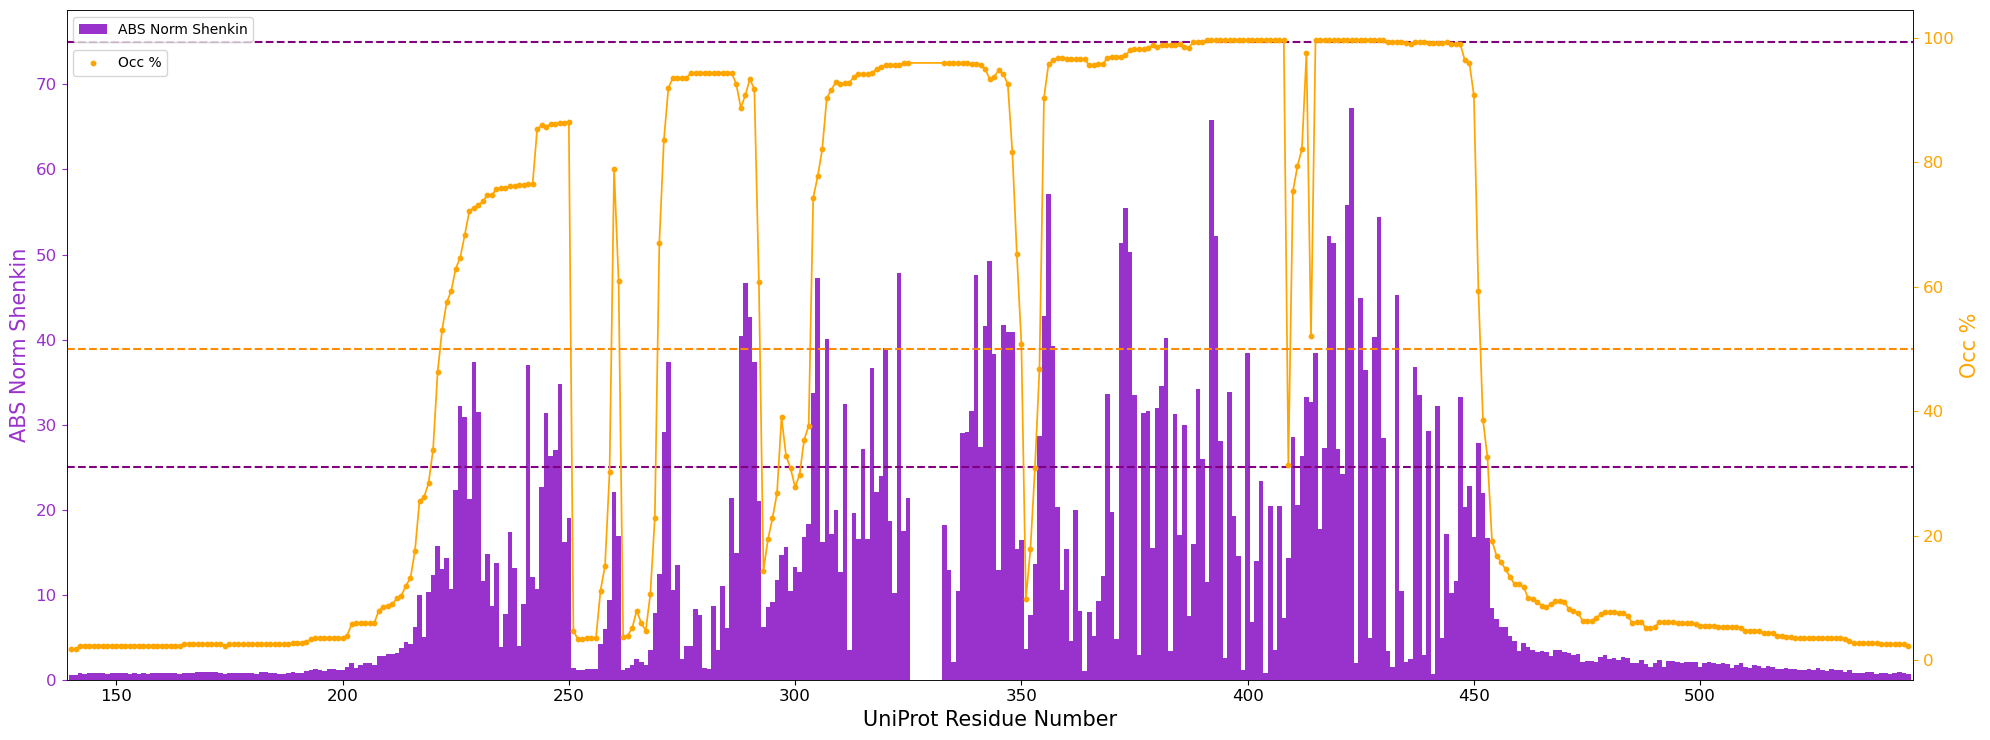

In [88]:
# Create the figure and the first axis (ax1)

plt.rcParams.update({"axes.linewidth": 0.5})

fig, ax1 = plt.subplots(figsize=(20, 7.5))

# Plot a barplot on ax1
ax1.bar(final_df['UniProt_ResNum'], final_df['abs_norm_shenkin'], color='darkorchid', label='ABS Norm Shenkin', width = 1)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('UniProt Residue Number', fontsize = 15)
ax1.set_ylabel('ABS Norm Shenkin', color='darkorchid', fontsize = 15)
ax1.tick_params('x', colors='k', labelsize=12)
ax1.tick_params('y', colors='darkorchid', labelsize=12)
ax1.axhline(y = 25, linestyle = '--', c = 'purple')
ax1.axhline(y = 75, linestyle = '--', c = 'purple')
# Create the second axis (ax2) based on the first axis (ax1)
ax2 = ax1.twinx()

# Plot a scatterplot + lineplot on ax2
ax2.scatter(final_df['UniProt_ResNum'], final_df['occ_pct'], color='orange', marker='o', label='Occ %', s = 10)
ax2.plot(final_df['UniProt_ResNum'], final_df['occ_pct'], color='orange', linewidth = 1.25)

# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Occ %', color='orange', fontsize = 15)
ax2.tick_params('y', colors='orange', labelsize=12)
ax2.axhline(y = 50, linestyle = '--', c = 'darkorange')

plt.xlim(final_df.UniProt_ResNum.min() - 1, final_df.UniProt_ResNum.max() + 1)

# Create legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))

# Show the plot
fig.tight_layout()
plt.show()
